In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [43]:
dt = 1e-2;
mass = m = 1.;
charge = q = 1.;
vAc = 3e-4;

duration = 3000;

v = np.array([0., 1., 0.]);
x = np.array([-1., 0., 0.]);

B = np.array([0., 0., 1.]);
E = np.array([0., 0., 0.]);

X = np.zeros((duration,3)) 
V = np.zeros((duration,3)) 

### Leapfrog
https://www.particleincell.com/2011/velocity-integration/

In [15]:
def EvalE(x):
    return E

In [16]:
for time in range(duration):
    # move velocity back by 0.5dt
    E = EvalE(x);
    v = v - 0.5*charge/mass*E*dt;

    # main loop
    E = EvalE(x);
    v = v + charge/mass*E*dt;
    x = x + v*dt;
    X[i] = x
    V[i] = v

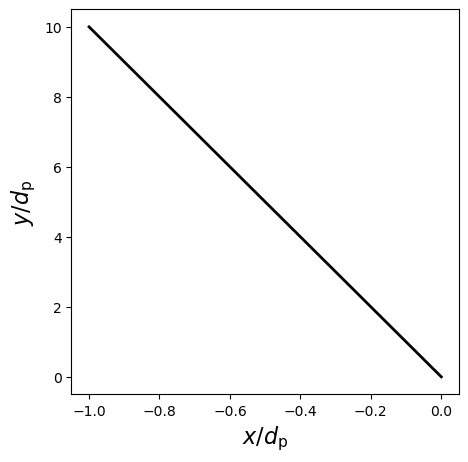

In [17]:
plt.figure(figsize=(5,5))

plt.plot(X[:,0],X[:,1],'k',linewidth=2.0); 
plt.xlabel(r'$x/d_{\rm p}$',fontsize=16)
plt.ylabel(r'$y/d_{\rm p}$',fontsize=16)

plt.show()

### Runga Kutta 4th Order

In [34]:
def rk4(x, v, a, dt):

    k1_v = a(x, v)
    k1_x = v

    k2_v = a(x + 0.5 * dt * k1_x, v + 0.5 * dt * k1_v)
    k2_x = v + 0.5 * dt * k1_v

    k3_v = a(x + 0.5 * dt * k2_x, v + 0.5 * dt * k2_v)
    k3_x = v + 0.5 * dt * k2_v

    k4_v = a(x + dt * k3_x, v + dt * k3_v)
    k4_x = v + dt * k3_v

    x_new = x + (dt / 6) * (k1_x + 2 * k2_x + 2 * k3_x + k4_x)
    v_new = v + (dt / 6) * (k1_v + 2 * k2_v + 2 * k3_v + k4_v)

    return x_new, v_new

In [35]:
for i in range(duration):
    X[i] = x
    V[i] = v
    x, v = rk4(x, v, lambda x, v: q/m * (E + np.cross(v, B)), dt)

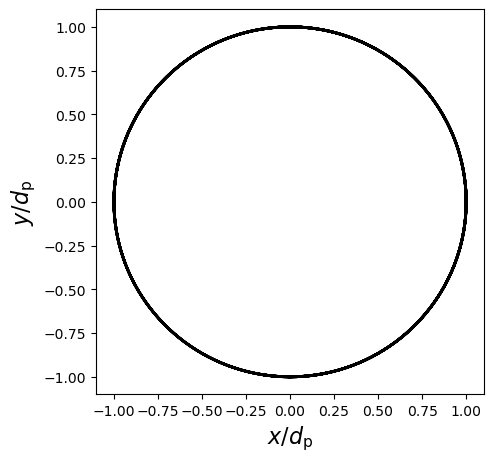

In [36]:
plt.figure(figsize=(5,5))

plt.plot(X[:,0],X[:,1],'k',linewidth=2.0); 
plt.xlabel(r'$x/d_{\rm p}$',fontsize=16)
plt.ylabel(r'$y/d_{\rm p}$',fontsize=16)

plt.show()

### Tajima Implicit
https://www.particleincell.com/2011/vxb-rotation/

In [38]:
for time in range(duration):
    v_minus_half = v - 0.5*q/m*E*dt;
    B_mag = np.linalg.norm(B)
    eps = q*B_mag/m*dt/2 # = omega*dt/2
    R = 1/B_mag * np.array([[0, B[2], -B[1]], [-B[2], 0, B[0]], [B[1], -B[0], 0]])
    M_minus = np.eye(3) - R * eps
    M_plus = np.eye(3) + R * eps
    M_inv = np.linalg.inv(M_minus) # matrix inversion
    v = M_inv @ (M_plus @ v_minus_half) + M_inv @ E * q/m * dt
    x = x + v*dt
    V[time] = v
    X[time] = x

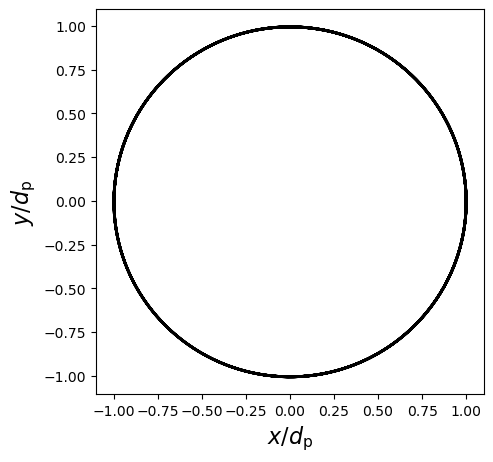

In [39]:
plt.figure(figsize=(5,5))

plt.plot(X[:,0],X[:,1],'k',linewidth=2.0); 
plt.xlabel(r'$x/d_{\rm p}$',fontsize=16)
plt.ylabel(r'$y/d_{\rm p}$',fontsize=16)

plt.show()

### Tajima Explicit
https://www.particleincell.com/2011/vxb-rotation/

In [41]:
for time in range(duration):
    v_minus_half = v - 0.5*q/m*E*dt;
    B_mag = np.linalg.norm(B)
    eps = q*B_mag/m*dt/2 # = omega*dt/2
    R = 1/B_mag * np.array([[0, B[2], -B[1]], [-B[2], 0, B[0]], [B[1], -B[0], 0]])
    M = np.eye(3) + R * eps
    v = q/m*E*dt/2 + M @ (v_minus_half + E * q/m * dt / 2)
    x = x + v*dt
    X[time] = x
    V[time] = v

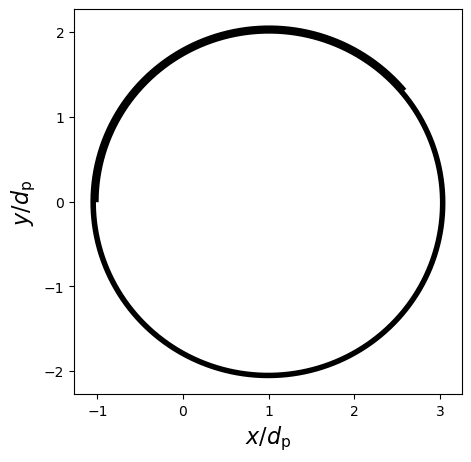

In [42]:
plt.figure(figsize=(5,5))

plt.plot(X[:,0],X[:,1],'k',linewidth=2.0); 
plt.xlabel(r'$x/d_{\rm p}$',fontsize=16)
plt.ylabel(r'$y/d_{\rm p}$',fontsize=16)

plt.show()

### Boris
https://www.particleincell.com/2011/vxb-rotation/

In [44]:
for time in range(duration):
    t = charge / mass * B * 0.5 * dt;
    s = 2. * t / (1. + t*t);
    v_minus = v + charge / (mass * vAc) * E * 0.5 * dt;
    v_prime = v_minus + np.cross(v_minus,t);
    v_plus = v_minus + np.cross(v_prime,s);
    v = v_plus + charge / (mass * vAc) * E * 0.5 * dt;
    x += v * dt;
    X[time,:] = x;
    V[time,:] = v; 

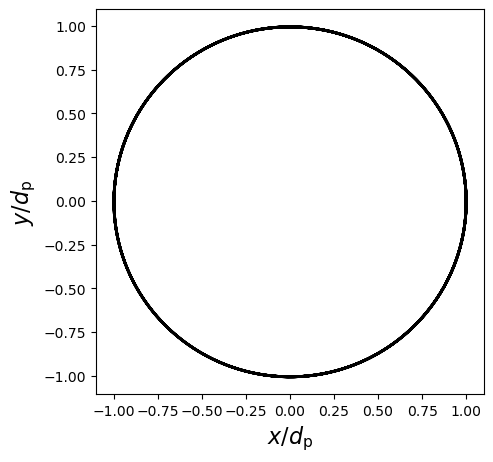

In [45]:
plt.figure(figsize=(5,5))

plt.plot(X[:,0],X[:,1],'k',linewidth=2.0); 
plt.xlabel(r'$x/d_{\rm p}$',fontsize=16)
plt.ylabel(r'$y/d_{\rm p}$',fontsize=16)

plt.show()

### Vay
https://iopscience.iop.org/article/10.3847/1538-4365/aab114/pdf

### Higuera-Cary
https://iopscience.iop.org/article/10.3847/1538-4365/aab114/pdf

### Implicit Midpoint
https://iopscience.iop.org/article/10.3847/1538-4365/aab114/pdf

### BGSDC
https://www.sciencedirect.com/science/article/pii/S2590055219300526</br>
https://ars.els-cdn.com/content/image/1-s2.0-S2590055219300526-gr001.gif